<a href="https://colab.research.google.com/github/KeopsKps/AnalyzingCOVID19/blob/master/Analyzing%20COVID-19%20Daily%20Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series analysis

<BarContainer object of 11 artists>

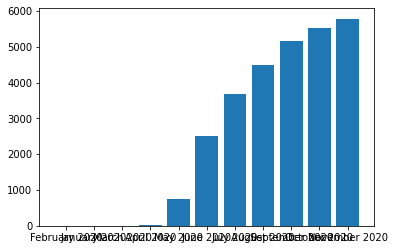

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

global_confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(global_confirmed_url)
df = df[df["Country/Region"] == 'Nicaragua']
drop_columns = ['Province/State', 'Country/Region', 'Lat', 'Long']
base_time_serie = df.drop(columns=drop_columns)
base_time_serie = base_time_serie.transpose()
base_time_serie.reset_index(level=0, inplace=True)
base_time_serie = base_time_serie.rename(columns={'index':'date', 195:'confirmed'})
base_time_serie['date'] = pd.to_datetime(base_time_serie['date'])
#base_time_serie = base_time_serie[base_time_serie['confirmed'] > 0] #getting elements greater than 0

grouped = base_time_serie.groupby(base_time_serie['date'].dt.strftime('%B %Y'))['confirmed'].max().sort_values()
#type(grouped)
#grouped.index
#grouped['index']

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.bar(grouped.index, grouped)  # Plot some data on the axes.

#plt.plot(base_time_serie['date'], base_time_serie['confirmed'])
